In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import configparser

In [2]:
# Read database configuration from the .ini file
config = configparser.ConfigParser()
config.read("../database.ini")

db_params = {
    "dbname": config["postgresql"]["dbname"],
    "user": config["postgresql"]["user"],
    "password": config["postgresql"]["password"],
    "host": config["postgresql"]["host"],
}


In [3]:
with psycopg2.connect(**db_params) as conn:
    # Parameterized query
    query = """
        select 
            "by"
            , count(id) as count
            ,avg(score) as avg_score

        from hacker_news.items

        where by is not null
        and type = 'story'

        group by "by"
        order by count desc
    """


In [4]:
# Read directly into DataFrame 
df = pd.read_sql_query(query, conn)
    
# Optionally specify column dtypes
df = pd.read_sql_query(
        query,
        conn
        # ,dtype={
        #     'integer_column': 'int32',
        #     'float_column': 'float64'
        # },
        # parse_dates=['date_column']  # Automatically parse date columns
    )

df.head()

/var/folders/40/wsz96msx0yj64gpqth1rs3b40000gn/T/ipykernel_17282/2978195756.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/var/folders/40/wsz96msx0yj64gpqth1rs3b40000gn/T/ipykernel_17282/2978195756.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


,by,count,avg_score
0,rbanffy,30849,9.041849
1,Tomte,23651,13.200161
2,tosh,20919,17.037526
3,pseudolus,16944,19.213291
4,bookofjoe,16097,10.900168


<Axes: xlabel='count', ylabel='avg_score'>

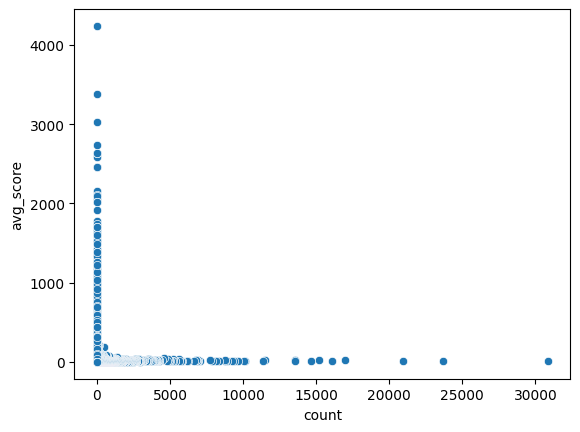

In [6]:
# Create scatter plot
sns.scatterplot(data=df, x='count', y='avg_score')